# **DSTEP20 // MIDTERM (60 pts)**

**Jan 24, 2020**

---

In this Midterm you will be working with two data sets in New York City: the Primary Land Use Taxlot Output (PLUTO) and Local Law 84 (LL84) data sets.  PLUTO consists of many building characteristics for each taxlot in the five boroughs while LL84 are the (required by law) annual reportings on energy consumption for buildings over a 30,000 sq-ft.

You will explore characteristics of these data sets independently and then in combination to answer several key questions about built structures and their energy use in NYC.

#### **<i><u>All figures must have appropriate axis labels and very brief captions.</u></i>**

---

In [0]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Working with the PLUTO data (25 pts)**

The PLUTO data for Manhattan is called **MN2017V11.csv** and is available in **dstep20/midterm/data/**.  Each row represents one building in Manhattan in 2017.

In [0]:
# -- load the PLUTO data (setting low_memory=False) into a DataFrame called plmn (2 pts)
fname = "drive/My Drive/dstep20/midterm/data/MN2017V11.csv"
plmn = pd.read_csv(fname, low_memory=False)

The "YearBuilt" column contains the year that the building was built.

In [0]:
# -- when was the oldest building built according to the PLUTO data? (2 pts)
print("the oldest building was built in {0}".format(plmn["YearBuilt"].min()))

the oldest building was built in 0


In [0]:
# -- when was the youngest building built according to the PLUTO data? (2 pts)
print("the oldest building was built in {0}".format(plmn["YearBuilt"].max()))

the oldest building was built in 2040


In [0]:
# -- create a new DataFrame called plmn_sp by sub-selecting only those buildings built after 1900 and before 2018 (4 pts)
ind_1900 = plmn["YearBuilt"] > 1900
ind_2018 = plmn["YearBuilt"] < 2018
ind_tot  = ind_1900 & ind_2018
plmn_sp  = plmn[ind_tot]

The square footage of the building is contained in the BldgArea column.

In [0]:
# -- what is the average square footage of buildings built between 1900 and 2018 in the PLUTO data? (2 pts)
print("the average square footage is {0} sqft".format(plmn_sp["BldgArea"].mean()))

the average square footage is 52921.80806209474 sqft


In [0]:
# -- what is the median of square footage of buildings built between 1900 and 2018 in the PLUTO data? (2 pts)
print("the median square footage is {0} sqft".format(np.median(plmn_sp["BldgArea"])))

the median square footage is 10500.0 sqft


In [0]:
# -- is the square footage of buildings in Manhattan built between 1900 and 2018 Normally distributed?  HOW DO YOU KNOW? (2 pts)
print("no, because the mean and median are very different")

no, because the mean and median are very different


In [0]:
# -- how many NaNs are in the first 10 columns in plmn_sp? (2 pts)
print(plmn_sp[plmn_sp.columns[:10]].isna().sum(axis=0))

Borough        0
Block          0
Lot            0
CD             0
CT2010         4
CB2010        17
SchoolDist     0
Council        0
ZipCode        3
FireComp       6
dtype: int64


In [0]:
# -- group plmn_sp by year built and sum to get the totals for each column in a given year (2 pts)
plmn_spyr = plmn_sp.groupby("YearBuilt").sum()

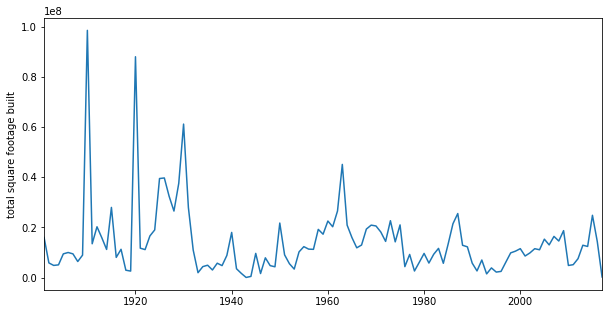

In [0]:
# -- use the above calculation to make a line plot of built area in a given year as a function of time (5 pts)
ax = plmn_spyr.plot(y="BldgArea", use_index=True, legend=False, figsize=[10, 5])
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("total square footage built")

The total square footage of new buildings built in a given year as a function of time.  There are no clear trends with time, but rather periods of high building activity (e.g., 1900-1935 and 1950-1980) and periods of relatively low building activity.

---

## **Working with Local Law 84 Data (10 pts)**

The LL84 data is called **local_law_84.csv** and is available in **dstep20/midterm/data/**.  Each row represents one building's energy consumption characteristics in 2017.

In [0]:
# -- load the LL84 data (setting low_memory=False) into a DataFrame called ll84 (2 pts)
fname = "drive/My Drive/dstep20/midterm/data/local_law_84.csv"
ll84 = pd.read_csv(fname, low_memory=False)

In [0]:
# -- sub-select only those rows in ll84 that represent buildings in Manhattan BOROUGH COLUMN (2 pts)
ll84 = ll84[ll84["Borough"] == "Manhattan"]

In [0]:
# -- create a DataFrame called ll84_eui that contains only the "BBL" and "EUI (kBtu/sqft)" columns of ll84 (2 pts)
ll84_eui = ll84[["BBL", "EUI (kBtu/sqft)"]]

In [0]:
# -- sort ll84_eui to find the top 10 buildings that had the highest energy use intensity "EUI (kBtu/sqft)" in 2017 and note the BBL of the largest consumer (2 pts)
print(ll84_eui.sort_values("EUI (kBtu/sqft)", ascending=False)[:10])

             BBL  EUI (kBtu/sqft)
3412  1014270011         126307.4
2839  1012880069          88701.1
2948  1013110040          77493.8
2756  1012730044          57361.3
1937  1009687501          54748.3
2753  1012730022          51697.6
2723  1012677502          50621.4
2938  1013100059          49620.8
2841  1012890028          32268.7
1836  1008977501          31552.6


In [0]:
# -- using the "OwnerName" and "BBL" columns in PLUTO, print the name of the owner of the building that had the highest energy use intensity in 2017 (2 pts)
print(plmn_sp[plmn_sp["BBL"] == 1014270011]["OwnerName"])

22202    ST MARYS HOME FOR GIR
Name: OwnerName, dtype: object


---

## **Estimating the Relationship Between Building Size and Energy Consumption (25 pts)**

A preprocessed file that merges LL84 and PLUTO data is called **pluto_mn_ll84.csv** and is available in **dstep20/midterm/data/**.  Each row represents one building in Manhattan 2017.


In [0]:
# -- load the merged PLUTO and LL84 file from Google Drive (2 pts)
fname = "drive/My Drive/dstep20/midterm/data/pluto_mn_ll84.csv"
plll84 = pd.read_csv(fname)

In [0]:
# -- sub-select only those rows for which total energy consumption is greater than zero (2 pts)
plll84 = plll84[plll84["Energy (kBtu)"] > 0.0]

In [0]:
# -- create a column called logBA that is the log10 of the Building Area in square feet (2 pts)
plll84["logBA"] = np.log10(plll84["BldgArea"])

In [0]:
# -- create a column called logE that is the log10 of the energy consumption in kBtu (2 pts)
plll84["logE"] = np.log10(plll84["Energy (kBtu)"])

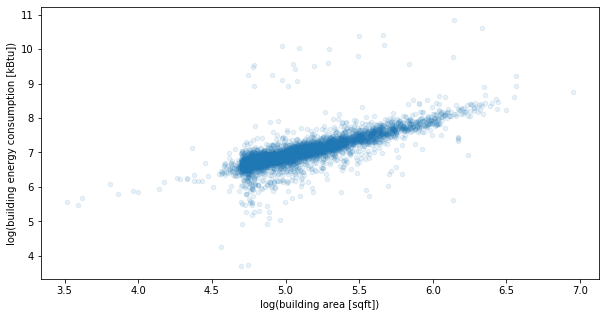

In [0]:
# -- make a scatter plot of log(energy consumption) vs log(building area) setting the transparency keyword alpha to 0.1 (5 pts)
ax = plll84.plot.scatter("logBA", "logE", alpha=0.1, figsize=[10, 5])
xlab = ax.set_xlabel("log(building area [sqft])")
ylab = ax.set_ylabel("log(building energy consumption [kBtu])")

The total energy consumption as a function of building square footage.  There is a general increase in total energy consumption (roughly linear in log-space) with increasing building area, although there is significant scatter around the trend.

In [0]:
# -- fit a linear model to log(energy consumption) vs log(building area) (2 pts)
model1 = sm.ols("logE ~ logBA", data=plll84)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   logE   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     6681.
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        05:58:04   Log-Likelihood:                -1070.4
No. Observations:                4458   AIC:                             2145.
Df Residuals:                    4456   BIC:                             2158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6630      0.066     25.270      0.0

In [0]:
# -- fit a quadratic model to log(energy consumption) vs log(building area) (2 pts)
model2 = sm.ols("logE ~ np.power(logBA, 2) + logBA", data=plll84)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   logE   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3350.
Date:                Wed, 29 Jan 2020   Prob (F-statistic):               0.00
Time:                        05:58:04   Log-Likelihood:                -1066.4
No. Observations:                4458   AIC:                             2139.
Df Residuals:                    4455   BIC:                             2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.5470      0

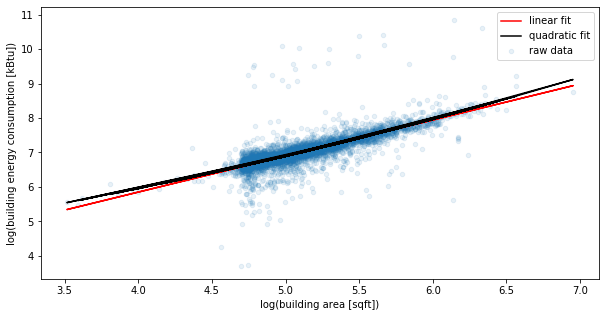

In [0]:
# -- overplot the linear and quadratic model on the data (4 pts)
pred1 = result1.predict(plll84)
pred2 = result2.predict(plll84)

ax = plll84.plot.scatter("logBA", "logE", label="raw data", alpha=0.1, figsize=[10, 5])
ax.plot(plll84["logBA"], pred1, color="red", label="linear fit")
ax.plot(plll84["logBA"], pred2, color="k", label="quadratic fit")
ax.legend()
xlab = ax.set_xlabel("log(building area [sqft])")
ylab = ax.set_ylabel("log(building energy consumption [kBtu])")

The same as the figure above, but with a best fit linear and quadratic model overlaid.  Given the significant scatter in the data, and the roughly equivalent R^2 of the model fits (0.6) there does not seem to be strong evidence for preferring one model over the other.

In [0]:
# -- use a likelihood ratio test to compare the two models (i.e., what is the p-value and its interpretation?) (2 pts)
lr, pval, df = result2.compare_lr_test(result1)

print("p-value = {0}".format(pval))

p-value = 0.004729406412517682


The relatively low p-value indicates that there is very little chance that the calculated likelihood ratio was found by random chance if the underlying process generating the data is linear, implying that the quadratic model is preferred.

In [0]:
# -- a developer is planning to build a 10,000,000 sqft building.  How much energy in kBtu do the models predict it will consume? (2 pts)
print("linear model : {0} kBtu".format(10**result1.predict({"logBA" : 7.0}).iloc[0]))
print("quadratic model : {0} kBtu".format(10**result2.predict({"logBA" : 7.0}).iloc[0]))

linear model : 974125820.1783446 kBtu
quadratic model : 1508452148.209177 kBtu
